In [21]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator


In [22]:
from keras.callbacks import ModelCheckpoint

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

In [24]:
img_size = (28, 28, 1)
layer_sizes = (128, 64)
n_filters = (32, 64, 128)
kernel_sizes = (7, 3, 3)
pool_size = 2
drop_prob = 0.5


n_classes = 345   #output_dim/units is equal to the number of image classes

In [25]:
model = Sequential([Convolution2D(filters = 32,
                        kernel_size = (3,3),
                        activation = "relu",
                        input_shape = img_size),
                    Convolution2D(filters = 32,
                        kernel_size = (3,3),
                        activation = "relu"),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(.20),
                    Convolution2D(filters = 64,
                        kernel_size = (3,3),
                        activation = "relu"),
                    Convolution2D(filters = 64,
                        kernel_size = (3,3),
                        activation = "relu"),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(.1),
                    Flatten(),
                    Dense(512, activation="relu"),
                    Dense(n_classes, activation="softmax") 
                   ])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)         

### Training the model

In [27]:
train_path = "datasets/data/train_set/"
test_path = "datasets/data/test_set/"

data_file_path = "datasets/data/numpy_bitmap"

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
%%time

training_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(28, 28),
        color_mode="grayscale",
        batch_size=256,
        class_mode='categorical')

Found 2760000 images belonging to 345 classes.
Wall time: 1min 54s


In [30]:
%%time

test_set = test_datagen.flow_from_directory(
        test_path,
        target_size=(28, 28),
        color_mode="grayscale",
        batch_size=256,
        class_mode='categorical')

Found 690000 images belonging to 345 classes.
Wall time: 29.2 s


In [31]:
model.compile(optimizer = "nadam", loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
save_cb = ModelCheckpoint("conv_doodle_model.h5",
                          save_best_only=True)

In [34]:
from keras.callbacks import TensorBoard

In [35]:
%%time

history = model.fit(
            training_set,
            steps_per_epoch=training_set.n//training_set.batch_size,
            epochs=10,
            validation_data=test_set,
            validation_steps=test_set.n//test_set.batch_size, 
            callbacks=[save_cb, TensorBoard(log_dir="QuickDraw")])



#history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=5, batch_size=256,
#          callbacks=[TensorBoard(log_dir="QuickDraw"), save_cb])



Epoch 1/10
10781/10781 [==============================] - 5571s 517ms/step - loss: 1.8302 - accuracy: 0.5695 - val_loss: 1.4702 - val_accuracy: 0.6386
Epoch 2/10
10781/10781 [==============================] - 5984s 555ms/step - loss: 1.5220 - accuracy: 0.6316 - val_loss: 1.5209 - val_accuracy: 0.6560
Epoch 3/10
10781/10781 [==============================] - 5745s 533ms/step - loss: 1.4756 - accuracy: 0.6411 - val_loss: 1.5490 - val_accuracy: 0.6553
Epoch 4/10
10781/10781 [==============================] - 5212s 483ms/step - loss: 1.4532 - accuracy: 0.6457 - val_loss: 1.3514 - val_accuracy: 0.6612
Epoch 5/10
10781/10781 [==============================] - 5185s 481ms/step - loss: 1.4399 - accuracy: 0.6485 - val_loss: 1.6489 - val_accuracy: 0.6641
Epoch 6/10
10781/10781 [==============================] - 7557s 701ms/step - loss: 1.4301 - accuracy: 0.6504 - val_loss: 1.6351 - val_accuracy: 0.6645
Epoch 7/10
10781/10781 [==============================] - 9309s 863ms/step - loss: 1.4240 - ac

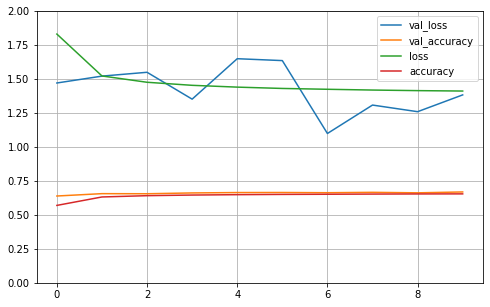

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2);

### Saving model

In [37]:
model.save("conv_doodle_model.h5")


In [38]:
model_json = model.to_json()
with open("conv_doodle_model_json.json", "w") as json_file:
    json_file.write(model_json)